# Using Pandas to work with log data

Hi! This is a Jupyter notebook. You can edit and run all the cells. Some cells are in markdown; when you run them they compile to HTML. Other cells are in Python; when you run them they execute the python code. All cells share a runtime environment.

The purpose of this notebook is to introduce you to how we will analyze logs. You'll need to learn the basics of Pandas on your own (the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/index.html) and community are really great; there are lots of [tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html)), but hopefully this notebook grounds the abstract in our particular use case.

Before you get started, make sure you have the latest version of this repo and that your dependencies are installed:

```
$ git pull
$ poetry install
```

Also make sure you have the latest log data from production. Run the following from this repo's base directory:

```
$ inv sync production
```

## Setup

Let's start by importing the libraries we'll need. (We add `../lib` to the system path so we can import stuff from the sibling `lib` directory).

In [5]:
import pandas as pd
from pathlib import Path

import sys
sys.path.append('../lib')
from log_reader import LogReader

Now we'll use `LogReader` to parse the logs into a dataframe.

In [58]:
logpath = "../data/logs/production"
df = LogReader(logpath).to_df()
df

,player,block,event,command,location_x,location_y,location_z,eye_location_x,eye_location_y,eye_location_z,eye_direction_pitch,eye_direction_yaw,target_block_x,target_block_y,target_block_z
timestamp,,,,,,,,,,,,,,,
2021-07-05 15:34:38.078200,thispettypace,minecraft:large_fern[half=upper],BlockBreakEvent,NaN,-19.0,72.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-05 15:34:40.003000,thispettypace,minecraft:large_fern[half=upper],BlockBreakEvent,NaN,-24.0,72.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-05 15:34:40.032800,thispettypace,"minecraft:spruce_leaves[distance=3,persistent=...",BlockBreakEvent,NaN,-25.0,71.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-05 15:35:06.028700,thispettypace,minecraft:stone,BlockPlaceEvent,NaN,-20.0,70.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-05 15:35:06.087000,thispettypace,minecraft:stone,BlockPlaceEvent,NaN,-20.0,71.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-05 15:44:19.027400,thispettypace,NaN,PlayerMoveEvent,NaN,-19.0,84.0,70.0,-19.0,84.0,70.0,68.743910,-111.669430,-15.0,76.0,69.0
2021-07-05 15:44:19.031600,thispettypace,NaN,PlayerMoveEvent,NaN,-19.0,84.0,70.0,-19.0,84.0,70.0,67.993910,-114.369446,-16.0,77.0,68.0
2021-07-05 15:44:19.037000,thispettypace,NaN,PlayerMoveEvent,NaN,-19.0,84.0,70.0,-19.0,84.0,70.0,63.193910,-128.169370,-15.0,77.0,67.0


That's too much data. Let's select just Chris's player move events within a particular time frame, and let's just work with the location columns.

In [59]:
moves = df[df.event == "PlayerMoveEvent"]
chris_moves = moves[moves.player == "thispettypace"]
trimmed_chris_moves = chris_moves["2021-07-05 15:30": "2021-07-05 15:45"]
locations = trimmed_chris_moves[["location_x", "location_y", "location_z"]]
locations

,location_x,location_y,location_z
timestamp,,,
2021-07-05 15:44:03.003000,-20.0,71.0,67.0
2021-07-05 15:44:03.028100,-20.0,71.0,67.0
2021-07-05 15:44:03.051500,-20.0,71.0,67.0
2021-07-05 15:44:03.056900,-20.0,71.0,67.0
2021-07-05 15:44:03.061300,-20.0,71.0,67.0
...,...,...,...
2021-07-05 15:44:19.027400,-19.0,84.0,70.0
2021-07-05 15:44:19.031600,-19.0,84.0,70.0
2021-07-05 15:44:19.037000,-19.0,84.0,70.0


In [66]:
location_deltas = pd.DataFrame({
    'mx': locations.location_x - locations.location_x.mean(),
    'my': locations.location_y - locations.location_y.mean(),
    'mz': locations.location_z - locations.location_z.mean(),
}, index=locations.index)

<AxesSubplot:xlabel='timestamp'>

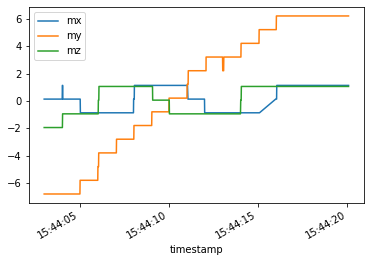

In [67]:
location_deltas.plot()

I was climbing a spiral staircase :)

## Next up

In [65]:
df.player.unique()

array(['thispettypace'], dtype=object)